In [3]:
%matplotlib inline
import os
import random
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
from ipywidgets import interact, fixed, IntSlider
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import seaborn as sns

In [4]:
cached_data={}
def stock_hist(symbol, start=None, end=None, cached_data=cached_data):
    if not symbol in cached_data:
        cached_data[symbol]=yf.download(symbol)
        print(F'Loaded {symbol} num values = {len(cached_data[symbol])}')
    return cached_data[symbol]

In [5]:
tickers=['MSFT', 'AMZN', 'GOOG', 'SQ', 'LOW', 'GLD' ]
N = len(tickers)
historical = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)

[*********************100%***********************]  1 of 1 completed
Loaded MSFT num values = 8734
[*********************100%***********************]  1 of 1 completed
Loaded AMZN num values = 5908
[*********************100%***********************]  1 of 1 completed
Loaded GOOG num values = 4082
[*********************100%***********************]  1 of 1 completed
Loaded SQ num values = 1248
[*********************100%***********************]  1 of 1 completed
Loaded LOW num values = 10248
[*********************100%***********************]  1 of 1 completed
Loaded GLD num values = 4018


In [16]:
historical.head()

,MSFT,AMZN,GOOG,SQ,LOW,GLD
Date,,,,,,
2015-11-19,49.350838,661.270020,738.409973,13.07,66.929443,103.559998
2015-11-20,49.579559,668.450012,756.599976,12.85,69.099945,103.089996
2015-11-23,49.579559,678.989990,755.979980,12.12,69.920708,102.260002
2015-11-24,49.634457,671.150024,748.280029,12.02,70.577332,102.940002
2015-11-25,49.122105,675.340027,748.150024,11.90,70.777969,102.459999


In [6]:
returns=(historical/historical.iloc[0]).fillna(method='backfill')
daily_pct_change=np.log(returns.pct_change() + 1)
vols = daily_pct_change.std() * np.sqrt(252)

In [12]:
vols

MSFT    0.277581
AMZN    0.302350
GOOG    0.264465
SQ      0.543054
LOW     0.318919
GLD     0.138194
dtype: float64

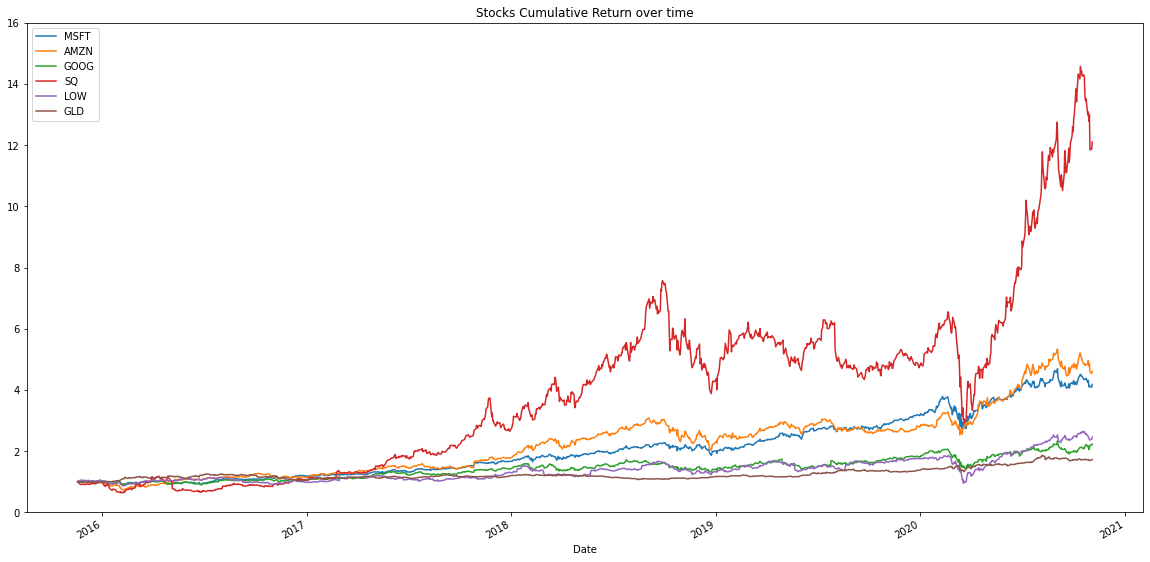

In [10]:
_ = returns.plot(ylim=(0,16), figsize=(20,10), title='Stocks Cumulative Return over time')

In [21]:
returns['PORTFOLIO']=returns.iloc[:, 0:N].sum(axis=1)/N

In [13]:
returns.head()

,MSFT,AMZN,GOOG,SQ,LOW,GLD,PORTFOLIO
Date,,,,,,,
2015-11-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-11-20,1.004635,1.010858,1.024634,0.983168,1.032430,0.995462,1.008531
2015-11-23,1.004635,1.026797,1.023794,0.927314,1.044693,0.987447,1.002447
2015-11-24,1.005747,1.014941,1.013367,0.919663,1.054503,0.994013,1.000372
2015-11-25,0.995365,1.021277,1.013191,0.910482,1.057501,0.989378,0.997866


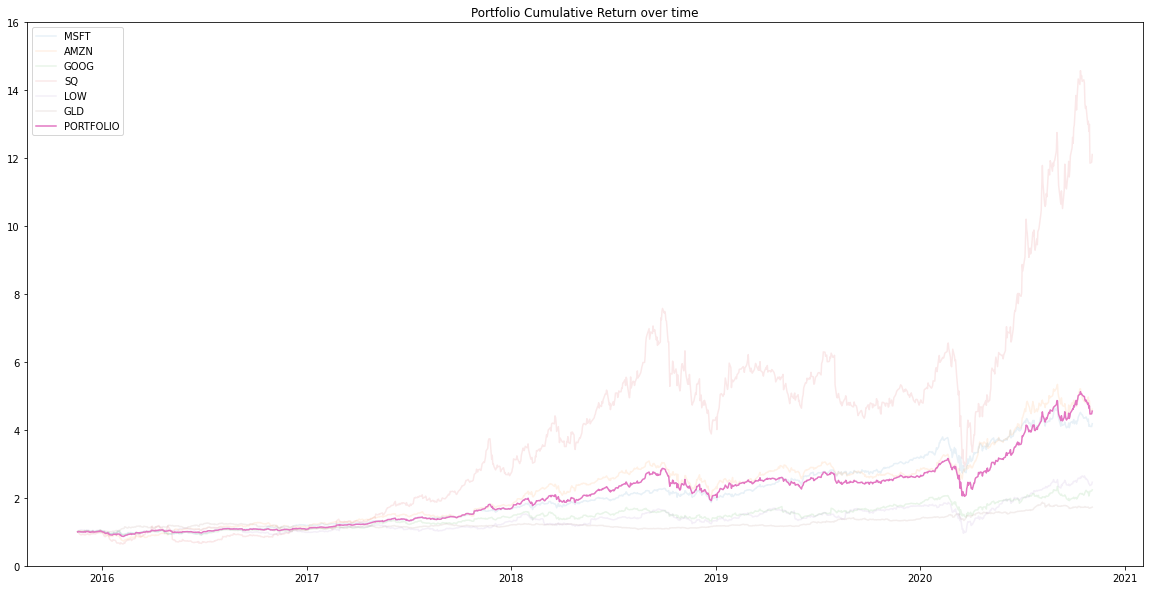

In [15]:
plt.figure(figsize=(20,10))
lines=plt.plot(returns.drop('PORTFOLIO', axis=1), alpha=0.1)
plt.ylim((0,16))
plt.title('Portfolio Cumulative Return over time')
plt.plot(returns['PORTFOLIO'], alpha=1)
plt.legend(returns.columns)
plt.show()

In [35]:
daily_pct_change = np.log(returns.pct_change() + 1)
vols = daily_pct_change.std()*np.sqrt(252) # Annual Volatility

tickers = ['AAPL', 'TSLA', 'FB', 'IBM', 'GOOG']
prices = [stock_hist(symbol)['Adj Close'] for symbol in tickers]

list

In [39]:
prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in tickers), axis=1, keys=tickers).dropna(axis=0)

In [40]:
prices.head()

,AAPL,TSLA,FB,IBM,GOOG
Date,,,,,
2012-05-18,16.368652,5.512,38.230000,144.467072,299.078979
2012-05-21,17.322281,5.754,34.029999,145.853592,305.908386
2012-05-22,17.189274,6.160,31.000000,145.160355,299.278229
2012-05-23,17.608683,6.204,32.000000,144.644089,303.592072
2012-05-24,17.446974,6.056,33.029999,144.621979,300.702881


In [45]:
def diversicheck(symbols, start_day=0, time_horizon=365, **active):
    filtered= [symbol for symbol in symbols if active.get(symbol, True)]
    prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in filtered), axis=1, keys=filtered).dropna(axis=0)
    
    start_dates = prices.index[0]+datetime.timedelta(days = start_day)
    end_dates = start_dates + datetime.timedelta(days=time_horizon)
    
    prices = prices.loc[start_dates:end_dates]
    
    unit_pos = prices/prices.iloc[0,:]
    basket = unit_pos.sum(axis=1)/unit_pos.shape[1]
    unit_pos.plot(figsize=(20,10), title='Stocks Cumulative Return over time', alpha=0.3)
    basket.plot(figsize=(20,10), legend=True)
    print(f'backtest from {start_dates} to {end_dates}')

In [42]:
prf_stocks = ['SPY', 'AAPL', 'TSLA', 'FB', 'IBM', 'GOOG']
active = dict(zip(prf_stocks, [True] * len(prf_stocks)))

In [46]:
_ = interact(diversicheck, symbols=fixed(prf_stocks), start_day=IntSlider(min=0, max=252*10),
            time_horizon=IntSlider(min=0, value=365, max=252*5), **active)

interactive(children=(IntSlider(value=0, description='start_day', max=2520), IntSlider(value=365, description=…

In [47]:
prf_prices = pd.concat((stock_hist(symbol)['Adj Close'] for symbol in prf_stocks), axis=1, keys=prf_stocks).dropna(axis=0)
prf_returns = (prf_prices.pct_change() + 1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

In [49]:
prf_prices.head()

,SPY,AAPL,TSLA,FB,IBM,GOOG
Date,,,,,,
2012-05-18,109.494896,16.368652,5.512,38.230000,144.467072,299.078979
2012-05-21,111.376915,17.322281,5.754,34.029999,145.853592,305.908386
2012-05-22,111.571007,17.189274,6.160,31.000000,145.160355,299.278229
2012-05-23,111.630142,17.608683,6.204,32.000000,144.644089,303.592072
2012-05-24,111.849564,17.446974,6.056,33.029999,144.621979,300.702881


In [48]:
prf_returns.head()

,SPY,AAPL,TSLA,FB,IBM,GOOG
Date,,,,,,
2012-05-21,1.017188,1.058259,1.043904,0.890139,1.009597,1.022835
2012-05-22,1.001743,0.992322,1.070560,0.910961,0.995247,0.978326
2012-05-23,1.000530,1.024399,1.007143,1.032258,0.996443,1.014414
2012-05-24,1.001966,0.990817,0.976144,1.032187,0.999847,0.990483
2012-05-25,0.996755,0.994640,0.984478,0.966091,0.990871,0.979906


In [50]:
log_returns.head()

,SPY,AAPL,TSLA,FB,IBM,GOOG
Date,,,,,,
2012-05-21,0.017042,0.056626,0.042968,-0.116378,0.009552,0.022578
2012-05-22,0.001741,-0.007708,0.068181,-0.093255,-0.004764,-0.021912
2012-05-23,0.000530,0.024107,0.007117,0.031749,-0.003563,0.014311
2012-05-24,0.001964,-0.009226,-0.024145,0.031680,-0.000153,-0.009562
2012-05-25,-0.003250,-0.005375,-0.015644,-0.034497,-0.009171,-0.020299


In [52]:
corr.head()

,SPY,AAPL,TSLA,FB,IBM,GOOG
SPY,1.000000,0.668919,0.406385,0.483034,0.698746,0.703259
AAPL,0.668919,1.000000,0.323568,0.395330,0.426210,0.523414
TSLA,0.406385,0.323568,1.000000,0.267627,0.237452,0.338784
FB,0.483034,0.395330,0.267627,1.000000,0.278726,0.500184
IBM,0.698746,0.426210,0.237452,0.278726,1.000000,0.477288


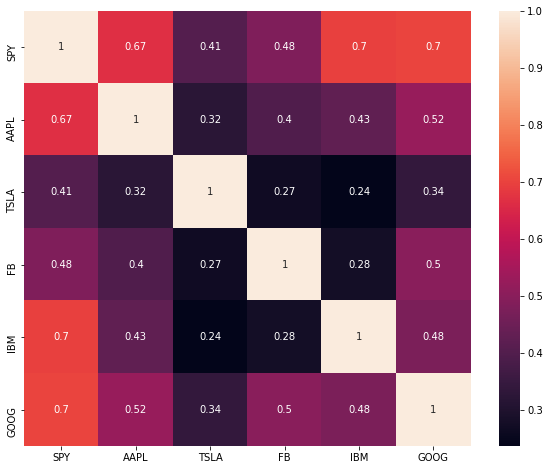

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [54]:
vols = log_returns.std()*np.sqrt(252)
avg_return = (prf_returns-1).mean()

In [55]:
avg_return.head()

SPY     0.000582
AAPL    0.001060
TSLA    0.002648
FB      0.001186
IBM    -0.000004
dtype: float64

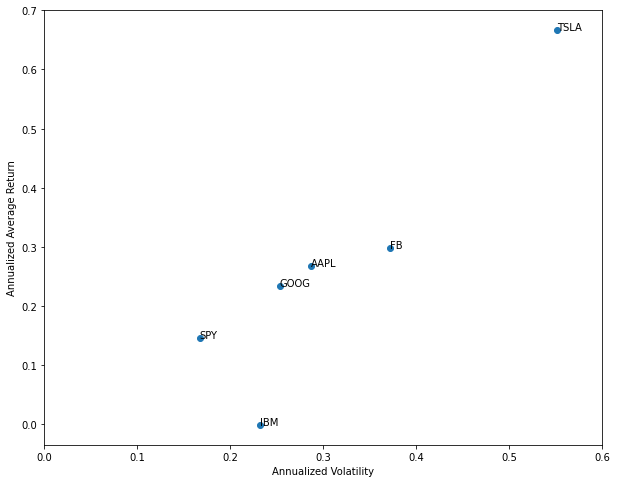

In [58]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(vols, avg_return*252)
ax.set_xlabel('Annualized Volatility')
ax.set_ylabel('Annualized Average Return')
ax.set_xlim(0, 0.6)
for i, txt in enumerate(prf_stocks):
    ax.annotate(txt, xy=(vols[i], avg_return[i]*252))

In [73]:
number_of_simulations = 1000
investment_horizon = 60
simulated = pd.DataFrame([(prf_returns.iloc[random.choices(
    range(len(prf_returns)), k=investment_horizon)]).mean(axis=1).cumprod().values
                          for x in range(number_of_simulations)]).T
simulated.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.018573,0.995981,0.986995,1.005530,0.998363,1.012447,1.006029,1.013282,1.023482,1.006912,...,0.987734,1.011457,1.016917,0.995175,0.997158,0.979954,0.999414,1.016057,1.012233,1.002673
1,0.964003,0.995056,0.981840,1.026461,0.999979,1.021296,1.028943,1.008653,1.022494,0.993144,...,0.987147,1.024307,1.006627,0.995604,0.998497,0.980375,1.033758,1.094712,1.018587,1.008524
2,0.969600,0.995088,0.987300,1.020687,0.994867,1.022535,1.028957,1.013218,0.967423,1.003089,...,0.989425,1.013971,1.015248,0.988556,0.986573,0.991457,1.029585,1.093722,1.018207,1.010203
3,0.966322,1.006074,0.974352,0.935904,1.008189,1.001501,1.055631,1.026991,0.971244,1.000605,...,0.975928,0.995611,1.014261,0.961167,0.997858,0.998219,1.033858,1.121029,1.000156,1.006891
4,0.976738,1.011988,0.986165,0.946062,1.003813,1.001097,1.036007,1.007703,0.962601,0.987466,...,0.964907,0.990443,0.996279,0.952674,0.984454,0.992716,1.068837,1.123785,0.997375,1.012937


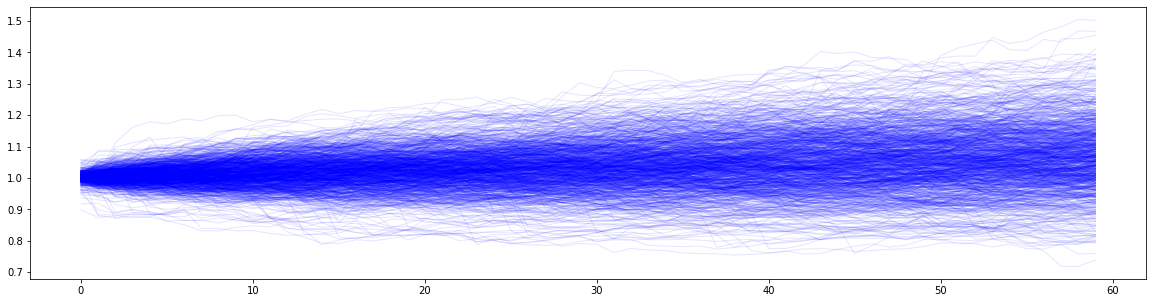

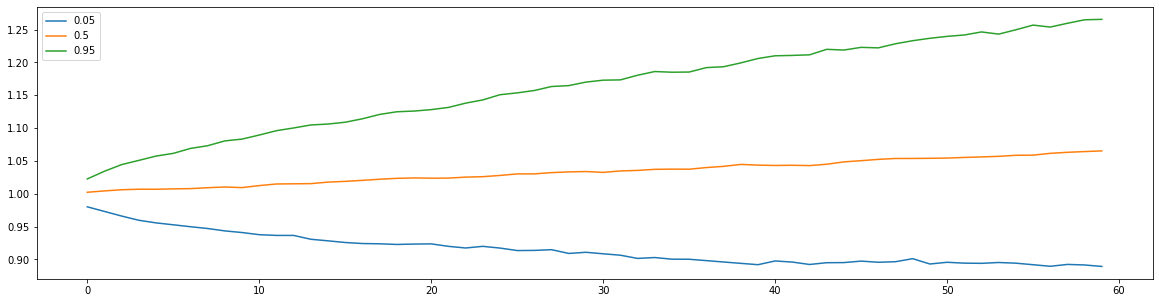

In [71]:
simulated.plot(legend=False, linewidth=1, alpha=0.1, color='blue', figsize=(20,5))
simulated.quantile([0.05, 0.50, 0.95], axis=1).T.plot(figsize=(20,5))